### Outlier treatment

In [1]:
# Load random set of values
import pandas as pd
import numpy as np
data = pd.read_csv("E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\dataset\\Meal and Tips-with outlier.csv") 
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

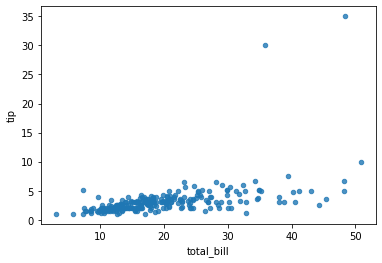

In [2]:
# Identifying outliers using scatter plot
data.plot.scatter('total_bill','tip',alpha=0.8)

<AxesSubplot:>

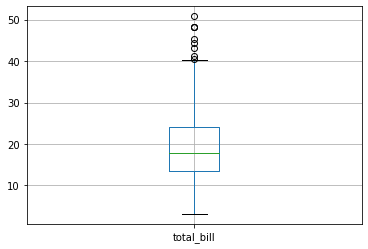

In [3]:
# Identifying outliers using box-whisker plot
data.boxplot('total_bill')

In [4]:
# Treating outlier using quantile
p25=data["tip"].quantile(0.25)
p75=data["tip"].quantile(0.75)
iqr = p75-p25
lowerValue = p25 - iqr
upperValue = p75 + iqr

In [5]:
# Replacing it with nan
data.loc[data.tip < lowerValue, 'tip'] = np.nan
data.loc[data.tip > upperValue, 'tip'] = np.nan
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# Replacing NA with mean using impute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data.iloc[:,1:2])
data.iloc[:, 1:2] =  imputer.transform(data.iloc[:, 1:2])
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

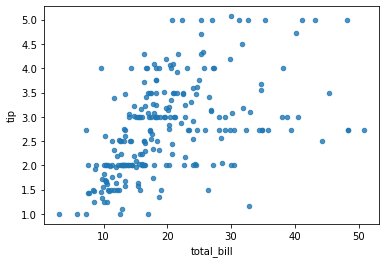

In [7]:
# Identifying outliers using scatter plot
data.plot.scatter('total_bill','tip',alpha=0.8)

### Missing value treatment

In [8]:
import pandas as pd
import numpy as np 
data1 = pd.DataFrame(data=[[1,2,3],[3,4,4],[3,5,np.nan],[6,7,8],[3,np.nan,1]], columns=['A', 'B', 'C'])
data1

,A,B,C
0,1,2.0,3.0
1,3,4.0,4.0
2,3,5.0,NaN
3,6,7.0,8.0
4,3,NaN,1.0


In [9]:
imputer = imputer.fit(data1.iloc[:,2:3])
data1.iloc[:, 2:3] =  imputer.transform(data1.iloc[:, 2:3])
data1

,A,B,C
0,1,2.0,3.0
1,3,4.0,4.0
2,3,5.0,4.0
3,6,7.0,8.0
4,3,NaN,1.0


In [10]:
imputer = imputer.fit(data1.iloc[:,1:2])
data1.iloc[:, 1:2] =  imputer.transform(data1.iloc[:, 1:2])
data1

,A,B,C
0,1,2.0,3.0
1,3,4.0,4.0
2,3,5.0,4.0
3,6,7.0,8.0
4,3,4.5,1.0


## Normalized data

### Min-max scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
data

[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [12]:
scaler = MinMaxScaler()
scaler.fit(data) 
print(scaler.transform(data)) 

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


### z-score normalization

In [13]:
import pandas as pd
data = [1,2,3,4,5]
df = pd.DataFrame(data)
normalized_df= df.transform(lambda x: (x - x.mean()) / x.std())
normalized_df

,0
0,-1.264911
1,-0.632456
2,0.000000
3,0.632456
4,1.264911


## Discretization

### Equal-width

In [14]:
import pandas as pd
import random
points = random.sample(range(1, 1000), 50)
bin = pd.cut(points, bins=8).value_counts()
bin

(9.014, 133.25]    8
(133.25, 256.5]    3
(256.5, 379.75]    8
(379.75, 503.0]    5
(503.0, 626.25]    7
(626.25, 749.5]    5
(749.5, 872.75]    7
(872.75, 996.0]    7
dtype: int64

### Equal-frequency

In [15]:
import pandas as pd
import random
points = random.sample(range(1, 10000), 500)
bins = pd.qcut(points, 5).value_counts()
bins

(5.999, 2411.2]     100
(2411.2, 4499.4]    100
(4499.4, 6260.0]    100
(6260.0, 8023.6]    100
(8023.6, 9976.0]    100
dtype: int64